<h1>Airline Review Sentiment - Classification Machine Learning project </h1>

<h3>Contents</h3>
<h3>
<ol>
    <li><b>Importing Libraries and Dataset</b></li>
    <li><b>Data Understanding</b></li>
    <li><b>Exploratory Data Analysis</b></li>
</ol>
</h3>
    

<h2>Importing Libraries and the Dataset</h2>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [60]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
airlines_data = pd.read_csv('Airline_review.csv')

In [62]:
airlines_data.head(2)

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no


In [63]:
airlines_data.shape

(23171, 20)

<h5>The data has 23,171 and 20 columns </h5>

In [64]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<h2>2. Data Understanding</h2>

In [65]:
airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

<ul>
    <li>There are 11 object type columns</li>
    <li>There are 8 numerical columns </li>
    <li>There is one Boolean Column </li>

In [66]:
airlines_data.describe()

,Unnamed: 0,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
count,23171.00000,19016.000000,18911.000000,14500.000000,18378.000000,10829.000000,5920.000000,22105.000000
mean,11585.00000,2.618374,2.871609,2.553586,2.353738,2.179056,1.780405,2.451165
std,6689.03588,1.464840,1.604631,1.526314,1.595747,1.488839,1.318800,1.594155
min,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5792.50000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,11585.00000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,17377.50000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000
max,23170.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [67]:
airlines_data.select_dtypes(include = 'object').describe()

,Airline Name,Overall_Rating,Review_Title,Review Date,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Recommended
count,23171,23171,23171,23171,23171,7129,19433,22075,19343,19417,23171
unique,497,10,17219,4557,23046,1048,4,4,13607,109,2
top,Aeromexico,1,Onur Air customer review,16th July 2023,FRA-LUX in Y class. Short trip connecting in F...,A320,Solo Leisure,Economy Class,Melbourne to Sydney,June 2023,no
freq,100,11595,84,67,2,1041,7120,19145,43,1057,15364


<strong>Inferences</strong>
<ul>
    <li>Unnamed Column one is the ID Column of review</li>
    <li>Multiple Columns have missing values.</li>
    <li>Sentiment analysis must be performend on 'Review_Title' and 'Review' Columns.</li>
</ul>

In [68]:
#Checking Percentage of Null Values
(airlines_data.isnull().sum()/airlines_data.shape[0])*100

Unnamed: 0                 0.000000
Airline Name               0.000000
Overall_Rating             0.000000
Review_Title               0.000000
Review Date                0.000000
Verified                   0.000000
Review                     0.000000
Aircraft                  69.233093
Type Of Traveller         16.132234
Seat Type                  4.730050
Route                     16.520651
Date Flown                16.201286
Seat Comfort              17.931898
Cabin Staff Service       18.385050
Food & Beverages          37.421777
Ground Service            20.685339
Inflight Entertainment    53.264857
Wifi & Connectivity       74.450822
Value For Money            4.600578
Recommended                0.000000
dtype: float64

<strong>There are columns that have greater than 50% Null Values</strong>
<p>Since it would be tought to impute these values, the columns with above 50% null values will be dropped</p>
<p>Dropping Column one as well because it is an ID column and adds no information.</p>

In [69]:
airlines_data.drop(columns = ['Unnamed: 0','Aircraft','Inflight Entertainment','Wifi & Connectivity'], inplace = True)

In [70]:
airlines_data.duplicated().sum() 

120

<p>There appear to be 27 rows that are complete duplicates of another row. These rows must be dropped.</p>

In [71]:
airlines_data.drop_duplicates(inplace=True)

<h2>3.Exploratory Data Analysis</h2>

In [72]:
#Column by Column
#Column : Airline Name
airlines_data['Airline Name'].value_counts().head(20)

Frontier Airlines            100
Jet Airways                  100
SilkAir                      100
Royal Air Maroc              100
Allegiant Air                100
Garuda Indonesia             100
Korean Air                   100
Lufthansa                    100
Virgin America               100
Lynx Air                     100
Ethiopian Airlines           100
AirAsia India                100
British Airways              100
Air Tahiti Nui               100
Aeroflot Russian Airlines    100
Volaris                      100
Spirit Airlines              100
LOT Polish Airlines          100
Go First                     100
Jetstar Pacific              100
Name: Airline Name, dtype: int64

The dataset appears to be imalanced. We will understand the distribution on the number of times an airline occurs

In [73]:
pd.Series(airlines_data['Airline Name'].value_counts().values).value_counts().head(10)

100    154
1       42
2       32
4       22
3       20
7       12
5       10
9       10
13       8
14       8
dtype: int64

<b>Inferences</b>
<p>There appear to be some airplines that have occured only a handfull of times. (1-6) Since these total upto less than 150, all the airlines with less that 10 Occurances will be renames to 'Miscellaneous' inorder to avoid the hamperance they would have otherwise caused.<p>

In [74]:
temp = airlines_data['Airline Name'].value_counts()
flights_to_rename = np.array(temp[temp < 10].index)
len(flights_to_rename)

157

In [75]:
airlines_data['Airline Name'].value_counts()

Frontier Airlines          100
Jet Airways                100
SilkAir                    100
Royal Air Maroc            100
Allegiant Air              100
                          ... 
TransNusa                    1
NextJet                      1
MEGA Maldives Airlines       1
Manta Air                    1
Cambodia Bayon Airlines      1
Name: Airline Name, Length: 497, dtype: int64

<strong>Doing this will help when we Encode this data in the future. We will reduce the overall dimensionality of this column</strong>

In [76]:
flights_to_rename[:5]

array(['Air KBZ', 'Thomas Cook Airlines Scandinavia',
       'Africa World Airlines', 'TAR Aerolineas', 'Ravn Alaska'],
      dtype=object)

In [77]:
airlines_data.replace(flights_to_rename, 'Miscellaneuous', inplace=True)

In [78]:
#overall rating column
airlines_data['Overall_Rating'].value_counts()

1    11587
2     2294
9     1768
8     1756
3     1353
7     1193
4      853
5      826
n      749
6      672
Name: Overall_Rating, dtype: int64

<p>There appears to be an entry of 'n' where all data should ideally be numeric</p>
<b>Identifying and correccting this error</b>

In [79]:
airlines_data[airlines_data['Overall_Rating'] == 'n'].iloc[0]

Airline Name                                               Adria Airways
Overall_Rating                                                         n
Review_Title                               Adria Airways customer review
Review Date                                             4th October 2007
Verified                                                           False
Review                 BRU-LJU-BRU. Outward flight on a CRJ200 very n...
Type Of Traveller                                                    NaN
Seat Type                                                            NaN
Route                                                                NaN
Date Flown                                                           NaN
Seat Comfort                                                         NaN
Cabin Staff Service                                                  NaN
Food & Beverages                                                     NaN
Ground Service                                     

It appears that 'n' appears whenever the review is not verifiied and/or the data fron other columns is missing.
Let us confirm this by reviewing other columns where the value in 'Overall_Rating' is 'n'.

In [80]:
(airlines_data[airlines_data['Overall_Rating'] == 'n'].isnull().sum()/airlines_data[airlines_data['Overall_Rating'] == 'n'].shape[0])*100

Airline Name             0.000000
Overall_Rating           0.000000
Review_Title             0.000000
Review Date              0.000000
Verified                 0.000000
Review                   0.000000
Type Of Traveller      100.000000
Seat Type               58.210948
Route                  100.000000
Date Flown             100.000000
Seat Comfort            76.368491
Cabin Staff Service     76.368491
Food & Beverages        76.368491
Ground Service         100.000000
Value For Money         57.810414
Recommended              0.000000
dtype: float64

In [81]:
airlines_data[airlines_data['Overall_Rating'] == 'n']['Verified'].value_counts()

False    749
Name: Verified, dtype: int64

In [82]:
airlines_data['Verified'].value_counts()

True     12319
False    10732
Name: Verified, dtype: int64

In [83]:
(airlines_data[airlines_data['Overall_Rating'] == 'n'].isnull().sum()/airlines_data.isnull().sum())*100

Airline Name                 NaN
Overall_Rating               NaN
Review_Title                 NaN
Review Date                  NaN
Verified                     NaN
Review                       NaN
Type Of Traveller      20.650675
Seat Type              44.084934
Route                  20.156082
Date Flown             20.565623
Seat Comfort           14.144411
Cabin Staff Service    13.786455
Food & Beverages        6.686148
Ground Service         15.997437
Value For Money        45.151199
Recommended                  NaN
dtype: float64

In [84]:
airlines_data.shape

(23051, 16)

<b>Inferences</b>
<p>It can be inferred that data graines that have an Overall_Rating of 'n' have higher amounts of Null values in their correspoding row entries.</p>
<p>This could signify that these entries are not completely valid and have be errantly entered.</p>
<p>Given this, it is best to drop rows with this error.</p>

In [85]:
airlines_data.drop(index = airlines_data[airlines_data['Overall_Rating'] == 'n'].index, inplace=True)

In [86]:
(airlines_data.isnull().sum()/airlines_data.shape[0])*100

Airline Name            0.000000
Overall_Rating          0.000000
Review_Title            0.000000
Review Date             0.000000
Verified                0.000000
Review                  0.000000
Type Of Traveller      12.904672
Seat Type               2.479598
Route                  13.303740
Date Flown             12.971931
Seat Comfort           15.568110
Cabin Staff Service    16.038920
Food & Beverages       35.794996
Ground Service         17.635190
Value For Money         2.358533
Recommended             0.000000
dtype: float64

In [87]:
airlines_data.shape

(22302, 16)

Significantly Lower number of Null Values in the Dataset, with a very small sacrifice on information loss.

<AxesSubplot:>

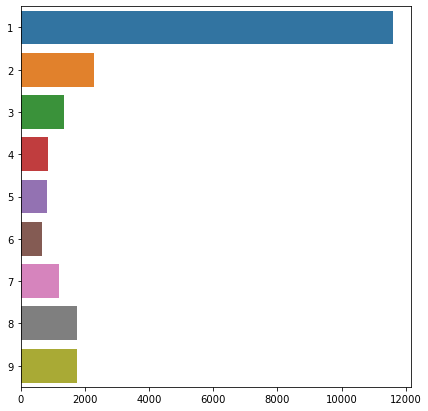

In [88]:
temp = airlines_data['Overall_Rating'].value_counts().sort_index()
plt.figure(figsize=(7,7))
sns.barplot(y = temp.index, x = temp.values)

<b>Most of the overall reviews appear to be '1' or a largely Negative Review.<b>

In [89]:
#Column 'Review_Title'
type(airlines_data['Review_Title'][0])

str

In [90]:
airlines_data['Review_Title'].duplicated().sum()

5085

In [91]:
airlines_data['Review'].duplicated().sum()

4

<b>Inferences</b>

Although there appear to be 5085 rows of data where the review title is duplicated, there are very few duplicated reviews, which means there are no double entires.

In [92]:
airlines_data['Review_Title'].value_counts().head(30)

Onur Air customer review              67
CityJet customer review               65
Germanwings customer review           65
US Airways customer review            60
Dragonair customer review             60
TAM Airlines customer review          59
Meridiana customer review             55
Olympic Air customer review           55
Cubana Airlines customer review       52
Shanghai Airlines customer review     50
Croatia Airlines customer review      49
Transaero Airlines customer review    49
QantasLink customer review            49
Openskies customer review             48
LAN Airlines customer review          46
Air Namibia customer review           45
Air Tahiti Nui customer review        45
Lao Skyway customer review            43
Bulgaria Air customer review          43
Firefly customer review               41
Air Dolomiti customer review          40
"Worst airline ever"                  40
Eastern Airways customer review       40
Caribbean Airlines customer review    39
Phuket Air custo

The reason for the duplication in the column appears to be because of the Generalized review title format that the airlines and reporting gateway company seem to follow.

We will have to keep this is mind when performing Sentiment Analysis on this column.

In [93]:
#Review Data Column
type(airlines_data['Review Date'][0])

str

In [94]:
def date_convertor(x):
    try: 
        return datetime.datetime.strptime(x,'%dth %B %Y')
    except:
        try:            
            return datetime.datetime.strptime(x,'%drd %B %Y')
        except:
            try:
                return datetime.datetime.strptime(x,'%dst %B %Y')
            except:
                return datetime.datetime.strptime(x,'%dnd %B %Y')
                

In [95]:
airlines_data['Review Date']=airlines_data['Review Date'].apply(date_convertor)

In [96]:
airlines_data['Review Date'][0].dayofweek, airlines_data['Review Date'][0].day_name()

(0, 'Monday')

<strong>We can now use this datetime column to generate more relevant features when in our Feature Engineering section of the project.</strong>

In [97]:
airlines_data['Verified'].value_counts(normalize=True)*100

True     55.237198
False    44.762802
Name: Verified, dtype: float64

Around 55% of the reviews in this dataset appear to be Verified, where as the rest do not. We will explore more of this when we generate correlation plots and heatmaps from this dataset in the Data Visualization Section of this course.

In [98]:
airlines_data['Review'].head()

0      Moroni to Moheli. Turned out to be a pretty ...
1     Moroni to Anjouan. It is a very small airline...
2      Anjouan to Dzaoudzi. A very small airline an...
3      Please do a favor yourself and do not fly wi...
4     Do not book a flight with this airline! My fr...
Name: Review, dtype: object

The reviews column has text. Let us analyse how long the text is and wheather there are any duplicates

In [99]:
airlines_data['Review'].duplicated().sum()

4

Since there are only 4 duplicates we can keep them. They can be attributed to a general filler review.

In [100]:
len(airlines_data['Review'][0])

352

In [101]:
airlines_data['Review'].tail()

23166     Bangkok to Tokyo. I’ve flown many low cost ai...
23167      Avoid at all costs. I booked flights to go f...
23168      Flight was leaving at 23.15 and after an hou...
23169     Zipair is JAL’s budget airline. They don’t ha...
23170      They lied about connection in Narita and we ...
Name: Review, dtype: object

Appropriate Stemming, followed by Sentiment Analysis must be done on this column at the time of Feature Engineering.

<BarContainer object of 4 artists>

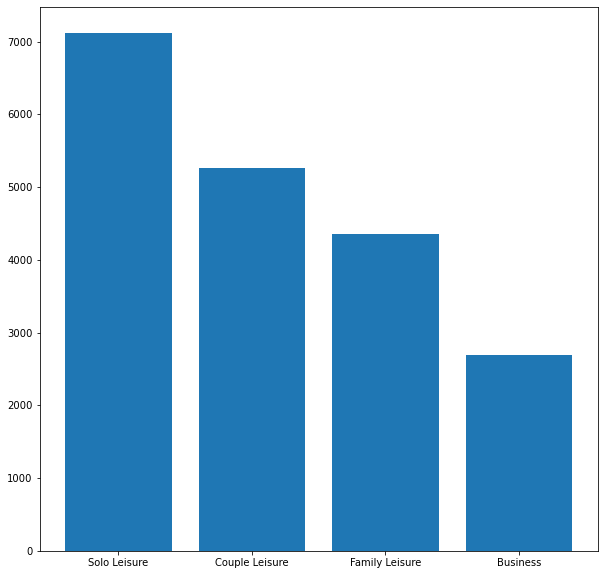

In [102]:
plt.figure(figsize = (10,10))
plt.bar(x = airlines_data['Type Of Traveller'].value_counts().index, height = airlines_data['Type Of Traveller'].value_counts().values)

There appear to be the most number of travellers in the Solo Leasure Column.

<AxesSubplot:xlabel='Type Of Traveller', ylabel='count'>

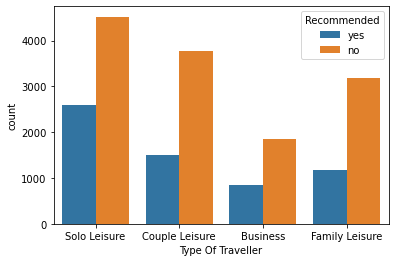

In [103]:
sns.countplot(airlines_data['Type Of Traveller'], hue=airlines_data['Recommended'])

<h3>3.1
    Data Visualizations</h3>

<AxesSubplot:xlabel='Overall_Rating', ylabel='count'>

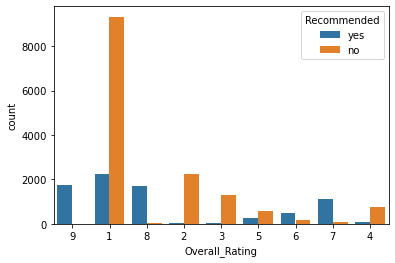

In [112]:
sns.countplot(airlines_data['Overall_Rating'],hue=airlines_data['Recommended'])

In [ ]:
numerical_columns = airlines_data.select_dtypes(include='Number').columns
for col in numerical_columns:
    plt.figure(figsize = ())
